<a href="https://colab.research.google.com/github/UTKARSHPATIDAR12345/DEPLOYMENT/blob/master/Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd

IMPORTING THE LIBRARIES WHICH MAKE THE BASE FOR THE MATHS BEHIND THE SCENES

In [3]:
dataset=pd.read_excel('/content/Bank_Personal_Loan_Modelling 1.xlsx')
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


***NOTE:-Here i have made some changes in the coloumn name such as personal loan because of some issues so please refer the excel sheet that i have attached below along with the project for getting error free analysis of my code.***

READING THE CONTENTS FROM THE FILES

On the dataset
The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign

In [4]:
dataset.shape

(5000, 14)

SHAPE ANALYSIS PART OF THE DATA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


IMPORTING ALL THE LIBRARIES REQUIRED

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   PersonalLoan        5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


DATA TYPE CHECKING

In [7]:
dataset.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


STATISTICAL SUMMARY OF THE DATA

In [9]:
dataset.apply(lambda x: len(x.unique()))


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
PersonalLoan             2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Information on the features or attributes
The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
Securities Account - Does the customer have a securities account with the bank?
CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?
Credit Card - Does the customer use a credit card issued by UniversalBank?
Interval variables are as below:

1 Age - Age of the customer
2 Experience - Years of experience
3 Income - Annual income in dollars
4 CCAvg - Average credit card spending
5 Mortage - Value of House Mortgage
6 Ordinal Categorical Variables are:

1 Family - Family size of the customer
2 Education - education level of the customer
The nominal variable is :

1 ID
2 Zip Code

In [11]:
dataset[dataset['Experience'] < 0]['Experience'].count()


52

CLEANING PROCESS CHECK FOR THE VARIABLES



1.   Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
2.   Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
3.Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
4.CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.
5.Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.
6The variables family and education are ordinal variables. The distribution of families is evenly distributes.





In [12]:
#clean the negative variable
dfExp = dataset.loc[dataset['Experience'] >0]
negExp = dataset.Experience < 0
column_name = 'Experience'
mylist = dataset.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [13]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

The following code does the below steps:

1. For the record with the ID, get the value of Age column
2. For the record with the ID, get the value of Education column
3. Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
4. Apply the median back to the location which had negative experience

In [14]:
for id in mylist:
    age = dataset.loc[np.where(dataset['ID']==id)]["Age"].tolist()[0]
    education = dataset.loc[np.where(dataset['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    dataset.loc[dataset.loc[np.where(dataset['ID']==id)].index, 'Experience'] = exp

In [ ]:
# checking if there are records with negative experience
dataset[dataset['Experience'] < 0]['Experience'].count()

0

In [15]:
dataset[dataset['Income'] < 0]['Income'].count()


0

In [16]:
dataset.dropna(inplace=True)

In [17]:
dataset[dataset['Securities Account'] < 0]['Securities Account'].count()

0

In [18]:
dataset[dataset['Mortgage'] == 0]['Mortgage'].count()

3439

NUMBER OF PEOPLE WITH ZERO MORTGAGE

In [19]:
dataset[dataset['CCAvg'] == 0]['CCAvg'].count()

106

STATISTICAL VERIFICATION OF CLEANING PART

Observation : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

Inference : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

Observation : Majority of customers who does not have loan have securities account

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

Observation The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

Observation



1.  Income and CCAvg is moderately correlated.
2.  Age and Experience is highly correlated



Applying models
1. Split data into train and test

In [20]:
# Matrix of features
X = dataset.iloc[:, [1,2,3,5,6,7,8,10,11,12,13]].values
# Dependent variable vector
Y = dataset.iloc[:, 9].values

In [21]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [22]:
# Feature Scaling (Must for PCA)
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

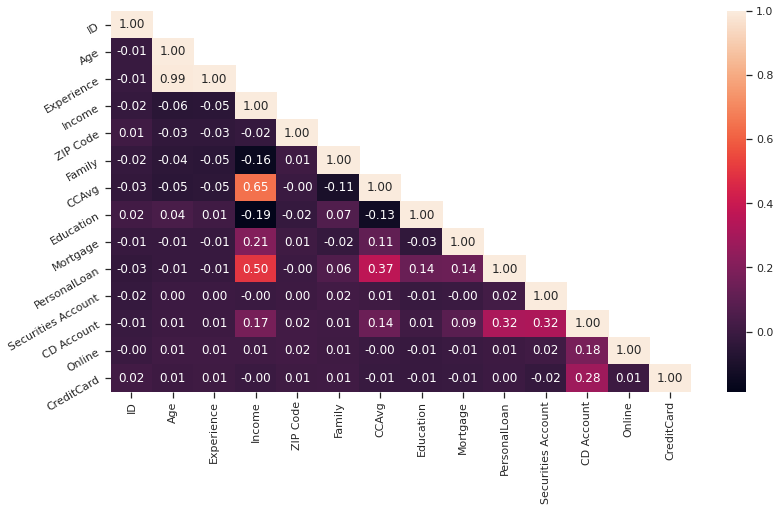

In [23]:


# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Age and Experience is highly correlated is the Observation.
These two varibles will be of our use to train the model and make predictions.

In [24]:
# Applying PCA (Unsupervised we do not need to pass Y_train in .fit_transform method)

from sklearn.decomposition import PCA

#pca = PCA(n_components=None)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [25]:
print(explained_variance)

[0.18395024 0.17100037]


This is just the conformation that age and experience are the two variables which we are gona use for the prdiction on the basis of statistical methods(which we already derived from heat map)

In [26]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, np.ravel(Y_train.astype(int)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Predicting the Test result set

Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

In [28]:
print(cm)

[[1306   37]
 [ 115   34]]


Metrix related to performance measuring using logistic regression.

In [29]:
print(1340/1492)

0.8981233243967829


THIS IS THE FINAL RESULT WITH 89.81 % ACCURACY OF PREDICTING THE RESULTS USING THE LOGISTIC REGRATION . 

In [30]:
train_set_indep = dataset.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = dataset["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [31]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.908843537414966


ANALYSING THE MODELS PREDICTION USING KNN ALGORITHM.
KNN ALGORITHM PROVIDES US WITH 90.88 % ACCURACY IN PREDICTION.

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
dt_model.score(X_train , Y_train)

0.9094567404426559

ANALYSING THE MODELS PREDICTION USING DECISION TREE CLASSIFIER ALGORITHM.
DECISION TREE CLASSIFIER ALGORITHM PROVIDES US WITH 97.93 % ACCURACY IN PREDICTION.

In [34]:
naive_model = GaussianNB()
naive_model.fit(X_train, Y_train)

prediction = naive_model.predict(X_train)
naive_model.score(X_train,Y_train)

0.8950847944811727

ANALYSING THE MODELS PREDICTION USING NAIVE MODEL ALGORITHM.
NAIVE MODEL ALGORITHM PROVIDES US WITH 88.93 % ACCURACY IN PREDICTION.

*CONCLUSION:-*
THE BEST ALGORITHM THAT CAN BE USED BY THE BANK TO REACH IT'S
DESIRED GOAL IS ***DECISION TREE ALGORITHM*** AS IT HAS THE MAXIMUM PREDICTION ACCURACY AMOST THE TESTED ALGORITHMS.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

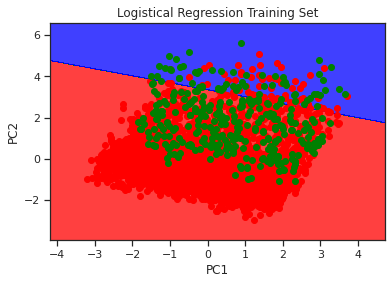

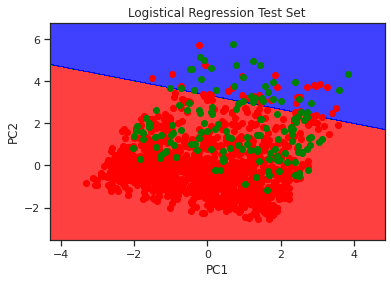

In [35]:
# Visualising the Training Set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Building the graph contour based on classification method
Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(Z_train).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

# Apply limits when outliers are present
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Creating the scatter plot of the Training set results
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[(y_set == j), 0], X_set[(y_set == j), 1],
            c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistical Regression Training Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.savefig('logistical-regression.png')
plt.figure()

# Visualising the Test Set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Building the graph contour based on classification method
Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(Z_train).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

# Apply limits when outliers are present
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Creating the scatter plot of the Training set results
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[(y_set == j), 0], X_set[(y_set == j), 1],
            c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistical Regression Test Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.savefig('logistical-regression.png')
plt.show()